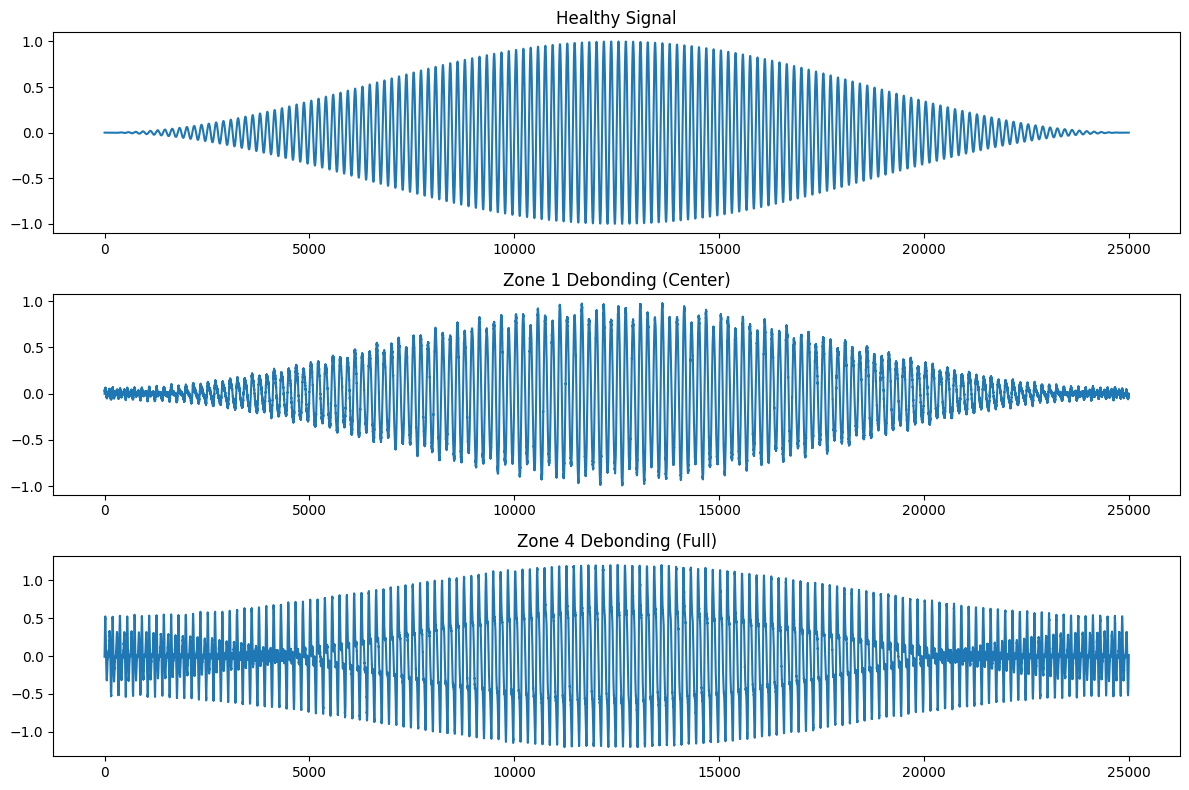

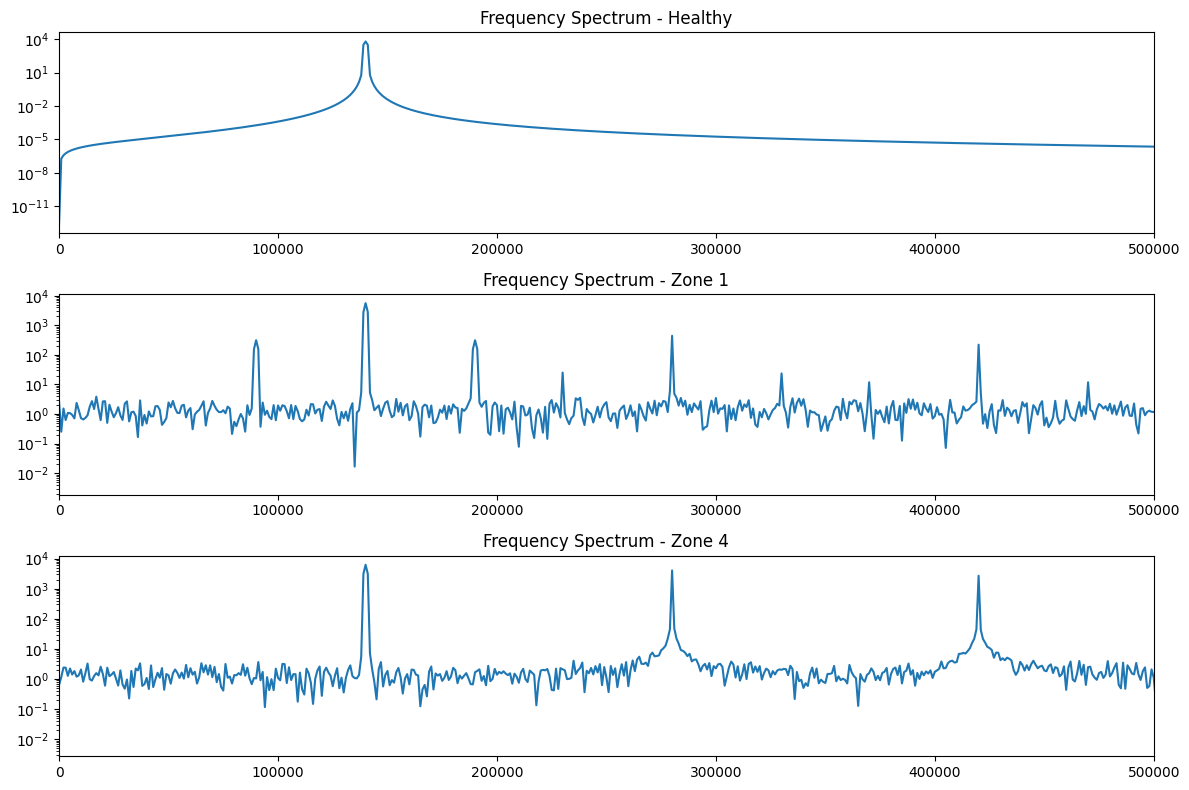

In [10]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))  # Adjust path if needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Now the imports will work
from src.data_processing.synthetic_data import SyntheticDataGenerator
from src.data_processing.data_loader import DataLoader
from src.data_processing.signal_preprocessing import SignalProcessor
from src.feature_extraction.harmonic_features import HarmonicFeatureExtractor
from src.feature_extraction.wavelet_transform import WaveletTransformer
from src.evaluation.visualization import plot_signals
import matplotlib.pyplot as plt
from src.data_processing.synthetic_data import SyntheticDataGenerator

# Initialize generator
generator = SyntheticDataGenerator()

# Generate sample signals
healthy = generator.generate_healthy_signal()
zone1 = generator.generate_sample(zone=1, size=100)
zone4 = generator.generate_sample(zone=4, size=300)

# Plot time domain
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(healthy)
plt.title("Healthy Signal")
plt.subplot(3, 1, 2)
plt.plot(zone1)
plt.title("Zone 1 Debonding (Center)")
plt.subplot(3, 1, 3)
plt.plot(zone4)
plt.title("Zone 4 Debonding (Full)")
plt.tight_layout()
plt.show()

# Plot frequency domain
plt.figure(figsize=(12, 8))
for i, (sig, label) in enumerate(zip([healthy, zone1, zone4], 
                                   ["Healthy", "Zone 1", "Zone 4"])):
    fft = np.abs(np.fft.fft(sig)[:len(sig)//2])
    freqs = np.fft.fftfreq(len(sig), 1/25e6)[:len(sig)//2]
    plt.subplot(3, 1, i+1)
    plt.semilogy(freqs, fft)
    plt.xlim(0, 500e3)
    plt.title(f"Frequency Spectrum - {label}")
plt.tight_layout()
plt.show()

In [2]:
import os
import sys
from pathlib import Path

# For Jupyter Notebook/IPython - use current directory as project root
project_root = Path(os.getcwd()).parent  # Goes up one level from current directory
sys.path.insert(0, str(project_root))

print(f"[DEBUG] Project root: {project_root}")
print(f"[DEBUG] Current working directory: {os.getcwd()}")

from src.data_processing.data_loader import DataLoader
from src.data_processing.signal_preprocessing import SignalProcessor

# Load and preprocess data
try:
    raw_data_path = project_root / 'data' / 'raw'
    print(f"[DEBUG] Attempting to load data from: {raw_data_path}")
    
    loader = DataLoader(raw_data_path)
    signals, labels = loader.load()
    
    processor = SignalProcessor()
    processed_signals = [processor.process(sig) for sig in signals]
    
    print("[SUCCESS] Data processed successfully!")
except Exception as e:
    print(f"[ERROR] Failed to process data: {str(e)}")
    raise

[DEBUG] Project root: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM
[DEBUG] Current working directory: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\notebooks
[DEBUG] Attempting to load data from: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\data\raw
[DEBUG] Attempting to read data from: c:\Users\LOLLA SRIKANTH\OneDrive - iitr.ac.in\Desktop\DEBONDING-DETECTION-SHM\data\raw
[DEBUG] Found files: ['labels.csv', 'signal_0.npy', 'signal_1.npy', 'signal_10.npy', 'signal_100.npy', 'signal_101.npy', 'signal_102.npy', 'signal_103.npy', 'signal_104.npy', 'signal_105.npy', 'signal_106.npy', 'signal_107.npy', 'signal_108.npy', 'signal_109.npy', 'signal_11.npy', 'signal_110.npy', 'signal_111.npy', 'signal_112.npy', 'signal_113.npy', 'signal_114.npy', 'signal_115.npy', 'signal_116.npy', 'signal_117.npy', 'signal_118.npy', 'signal_119.npy', 'signal_12.npy', 'signal_120.npy', 'signal_121.npy', 'signal_122.

In [4]:

print(f"Total signals loaded: {len(signals)}")

Total signals loaded: 2


Total signals available: 2
Sample rate: 25000000.0
Fundamental frequency: 140000.0


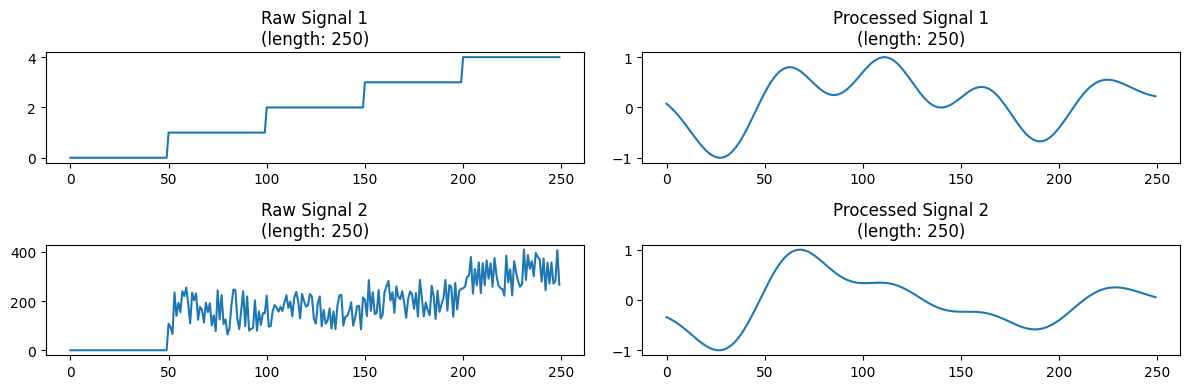

In [5]:
from src.data_processing.signal_preprocessing import SignalProcessor

# Verify signals
print(f"Total signals available: {len(signals)}")
print(f"Sample rate: {processor.config['sample_rate']}")
print(f"Fundamental frequency: {processor.config['fundamental_freq']}")

# Process only available signals
num_to_process = min(3, len(signals))
processor = SignalProcessor()
processed = [processor.process(signals[i]) for i in range(num_to_process)]

# Plotting
plt.figure(figsize=(12, 2*num_to_process))
for i in range(num_to_process):
    # Raw signal
    plt.subplot(num_to_process, 2, 2*i+1)
    plt.plot(signals[i])
    plt.title(f'Raw Signal {i+1}\n(length: {len(signals[i])})')
    
    # Processed signal
    plt.subplot(num_to_process, 2, 2*i+2)
    plt.plot(processed[i])
    plt.title(f'Processed Signal {i+1}\n(length: {len(processed[i])})')

plt.tight_layout()
plt.show()

Harmonic Features: {'h1_max': 0, 'h1_mean': 0, 'h1_std': 0, 'h1_area': 0, 'h2_max': 0, 'h2_mean': 0, 'h2_std': 0, 'h2_area': 0, 'h3_max': 0, 'h3_mean': 0, 'h3_std': 0, 'h3_area': 0}


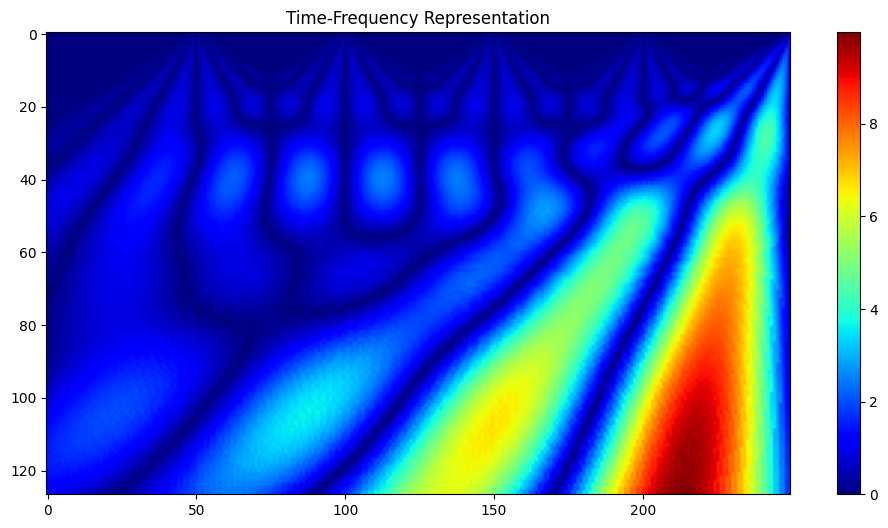

In [6]:
from src.feature_extraction.harmonic_features import HarmonicFeatureExtractor
from src.feature_extraction.wavelet_transform import WaveletTransformer

# Analyze harmonic features
harmonic_extractor = HarmonicFeatureExtractor()
features = harmonic_extractor.extract(signals[0])
print("Harmonic Features:", features)

# Analyze wavelet features
wavelet_transformer = WaveletTransformer()
tfrep = wavelet_transformer.transform(signals[0])

plt.figure(figsize=(12, 6))
plt.imshow(tfrep, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('Time-Frequency Representation')
plt.show()

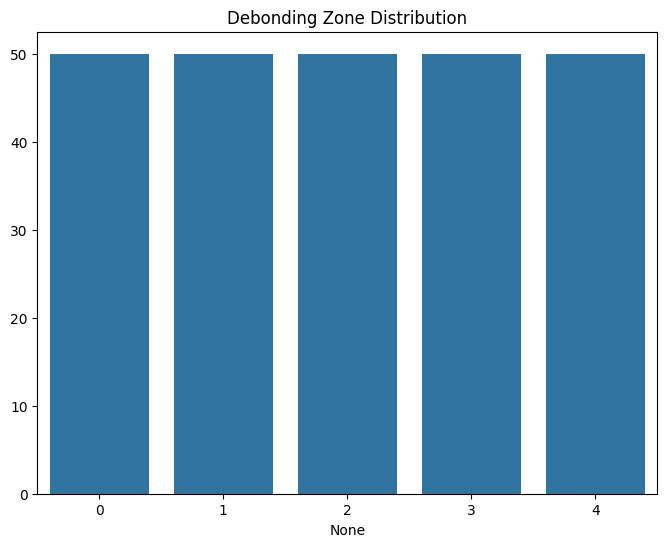

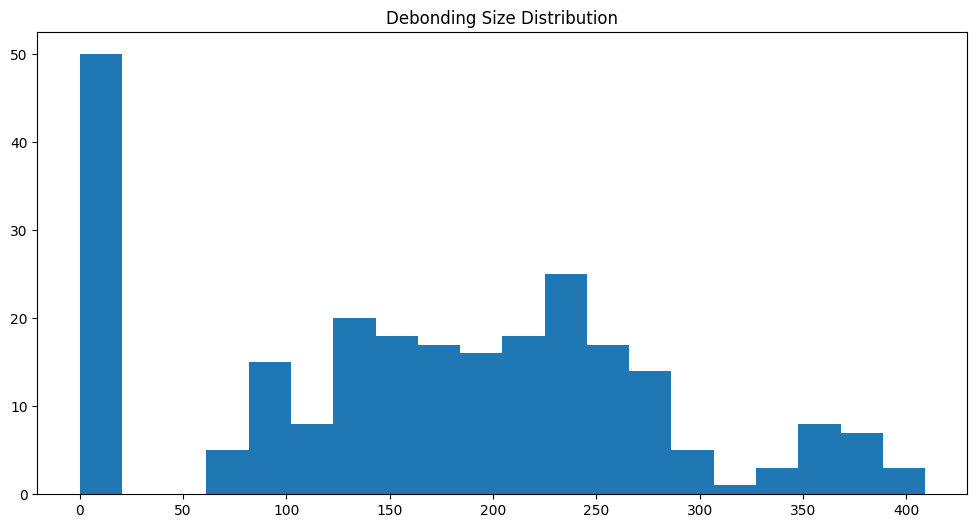

In [7]:
import pandas as pd
import seaborn as sns

# Analyze zone distribution
zone_counts = pd.Series(labels['zone']).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values)
plt.title('Debonding Zone Distribution')
plt.show()

# Analyze size distribution
plt.figure(figsize=(12, 6))
plt.hist(labels['size'], bins=20)
plt.title('Debonding Size Distribution')
plt.show()